In [ ]:
import pandas as pd
import numpy as np
import modified_tcdf
from statistics import mean
import seaborn as sns

In [ ]:
def flatten_tuple_list(tuples):
    return list(sum(tuples, ()))

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


def plotgraph(edge_weights, columns):
    G = nx.DiGraph()
    for c in columns:
        G.add_node(c)

    for edge in edge_weights:
        G.add_edge(columns[edge[1]], columns[edge[0]], weight=edge_weights[edge])
    pos = nx.circular_layout(G)
    nx.draw(G,pos, node_color = 'lightblue', edge_color='black',node_size=500,with_labels = True)
    plt.show()
    return G

In [ ]:
def average_dist(df_pos):    
    columns = list(df_pos)
    pigeons = [columns[3*x][-1] for x in range(len(columns)//3)]
    ave_dist = pd.DataFrame(columns = pigeons, index = pigeons)
    ave_dist

    for pigeon in range(df_pos.shape[1]//3):    
        row = np.array(df_pos[0:1]).reshape(df_pos.shape[1]//3,3)
        distances = np.array([np.linalg.norm(row - row[pigeon], axis=1)])

        for i in range(1,len(df_pos)):    
            row = np.array(df_pos[i:i+1]).reshape(df_pos.shape[1]//3,3)
            dist = np.linalg.norm(row - row[pigeon], axis=1)
            distances = np.append(distances, [dist], axis=0)

        ave_dist.loc[pigeons[pigeon]]=distances.mean(axis=0)
    return ave_dist

In [ ]:
def flatten_tuple_list(tuples):
    return list(sum(tuples, ()))

In [ ]:
cuda = True
loginterval = 100
seed = 1000
kernel_size=2
levels=1
nrepochs=500
learningrate=0.1
optimizername="Adam"
dilation_c=4

def runCausality(df_data):   
    """Multivariate Causal Discovery"""
    allcauses = dict()
    allreallosses=dict()
    allscores=dict()
    alldelays = dict()
    
    columns = list(df_data)
    for c in [columns[i:i+3] for i in range(0, len(columns), 3)]:
        idx = df_data.columns.get_loc(c[0])//3
        causes, causeswithdelay, realloss, scores = causal_inference7.findcauses(c, cuda=cuda, epochs=nrepochs, 
                        kernel_size=kernel_size, layers=levels, log_interval=loginterval, 
                        lr=learningrate, optimizername=optimizername, seed=seed, 
                        dilation_c=dilation_c, dframe=df_data)
        allscores[idx]=scores
        allcauses[idx]=causes
        allreallosses[idx]=realloss
        alldelays.update(causeswithdelay)

    G = plotgraph(alldelays, [columns[3*x][-1] for x in range(len(columns)//3)])
    # print(allscores)
    # display(pd.DataFrame.from_dict(allscores, orient='index'))

    # Create a larger figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create a heatmap
    sns.heatmap(pd.DataFrame.from_dict(allscores, orient='index'), annot=True, cmap='coolwarm_r', ax=ax)

    # Add labels for the rows and columns
    plt.xlabel('Pigeons')
    plt.ylabel('Pigeons')

    # Show the plot
    plt.show()
    return allcauses, alldelays, G

In [ ]:
import networkx as nx

def determine_leader2(G):
    # Initialize a dictionary to store the results
    results = {}

    # Iterate over nodes (pigeons) in the graph
    for node in G.nodes():
        # Extract the number of descendant nodes of the current node
        descendants = nx.descendants(G, node)
        # Store the number of descendant nodes in the results dictionary
        results[node] = len(descendants)

    # Find the node with the most descendant nodes
    leader = max(results, key=results.get)

    # Print the results
    print("Results:")
    for node, degree in results.items():
        print(f"{node} has {degree} descendant nodes.")
    print(f"{leader} has the most descendant nodes and is the leader.")
    
    return leader

FREE FLIGHT A1 CAUSAL INFERENCE:


,posx_p0,posy_p0,posz_p0,velx_p0,vely_p0,velz_p0,accx_p0,accy_p0,accz_p0,posx_p1,...,accz_p7,posx_p9,posy_p9,posz_p9,velx_p9,vely_p9,velz_p9,accx_p9,accy_p9,accz_p9
0,-8.4074,2.7567,62.7728,0.0298,0.0095,0.0102,-0.0585,-0.0816,-0.0112,-5.8053,...,-0.0202,-6.6145,-4.3501,57.4227,-0.1120,-0.0604,-0.0093,0.0091,0.0057,0.0149
1,-8.4047,2.7572,62.7738,0.0233,0.0006,0.0094,-0.0728,-0.0958,-0.0067,-5.7985,...,-0.0280,-6.6256,-4.3562,57.4218,-0.1102,-0.0598,-0.0079,0.0257,0.0057,0.0119
2,-8.4028,2.7568,62.7747,0.0157,-0.0093,0.0090,-0.0826,-0.1065,-0.0001,-5.7915,...,-0.0291,-6.6365,-4.3621,57.4211,-0.1070,-0.0586,-0.0068,0.0402,0.0150,0.0096
3,-8.4016,2.7553,62.7756,0.0077,-0.0197,0.0091,-0.0799,-0.1058,0.0038,-5.7843,...,-0.0241,-6.6470,-4.3679,57.4205,-0.1025,-0.0560,-0.0059,0.0505,0.0346,0.0085
4,-8.4012,2.7529,62.7765,0.0008,-0.0294,0.0092,-0.0638,-0.0909,0.0002,-5.7768,...,-0.0180,-6.6570,-4.3733,57.4199,-0.0971,-0.0514,-0.0051,0.0580,0.0577,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17020,21.3448,12.3965,59.5139,0.0185,0.0021,-0.0936,0.0046,0.0310,0.0327,18.4977,...,0.0004,20.8896,8.8369,59.7858,0.0016,-0.0056,-0.0522,0.0097,0.0009,0.0188
17021,21.3467,12.3969,59.5047,0.0191,0.0056,-0.0902,0.0053,0.0425,0.0354,18.5615,...,0.0003,20.8898,8.8363,59.7806,0.0023,-0.0061,-0.0508,0.0055,-0.0092,0.0105
17022,21.3486,12.3977,59.4959,0.0199,0.0094,-0.0869,0.0092,0.0402,0.0306,18.6278,...,-0.0035,20.8901,8.8356,59.7756,0.0027,-0.0077,-0.0503,0.0015,-0.0198,0.0001
17023,21.3507,12.3988,59.4873,0.0209,0.0122,-0.0839,0.0158,0.0168,0.0347,18.6939,...,-0.0129,20.8903,8.8348,59.7706,0.0028,-0.0105,-0.0507,-0.0002,-0.0452,-0.0126


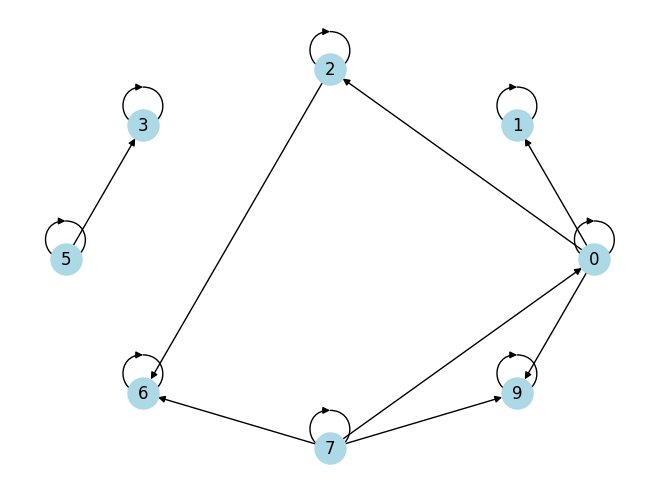

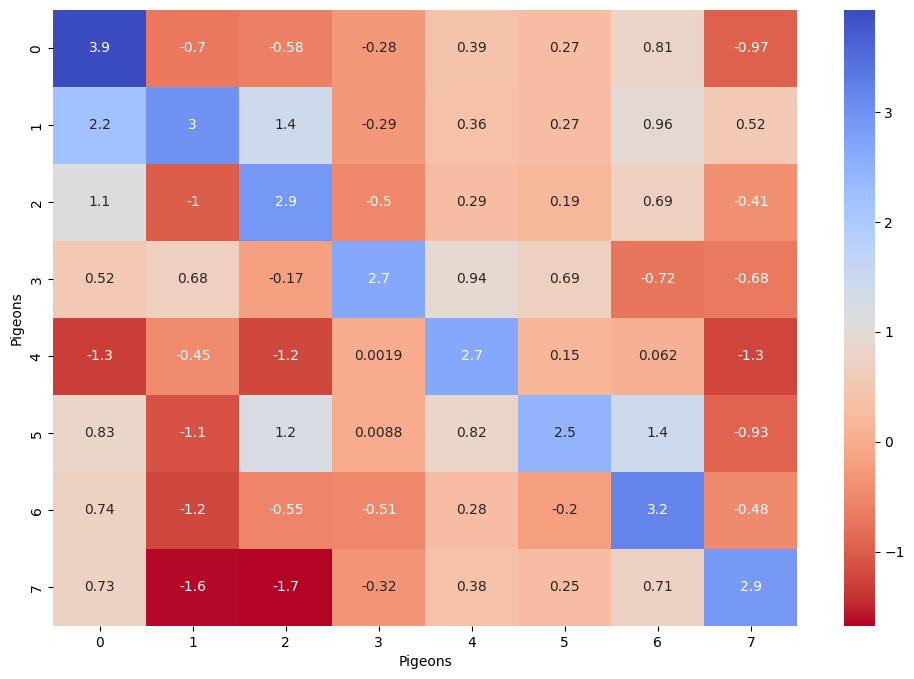

Results:
0 has 4 descendant nodes.
1 has 0 descendant nodes.
2 has 1 descendant nodes.
3 has 0 descendant nodes.
5 has 1 descendant nodes.
6 has 0 descendant nodes.
7 has 5 descendant nodes.
9 has 0 descendant nodes.
7 has the most descendant nodes and is the leader.


,0,1,2,3,5,6,7,9
0,0.0,11.26498,16.496406,27.380554,24.039058,13.72227,11.324821,17.158011
1,11.26498,0.0,13.196426,30.197983,26.432198,14.008868,10.508283,16.863634
2,16.496406,13.196426,0.0,34.54882,29.695656,16.359205,13.755097,21.449168
3,27.380554,30.197983,34.54882,0.0,14.059102,24.000382,28.813032,23.188852
5,24.039058,26.432198,29.695656,14.059102,0.0,18.346066,23.994773,19.527964
6,13.72227,14.008868,16.359205,24.000382,18.346066,0.0,10.666771,19.937294
7,11.324821,10.508283,13.755097,28.813032,23.994773,10.666771,0.0,15.264441
9,17.158011,16.863634,21.449168,23.188852,19.527964,19.937294,15.264441,0.0


FREE FLIGHT A2 CAUSAL INFERENCE:


,posx_p0,posy_p0,posz_p0,velx_p0,vely_p0,velz_p0,accx_p0,accy_p0,accz_p0,posx_p1,...,accz_p8,posx_p9,posy_p9,posz_p9,velx_p9,vely_p9,velz_p9,accx_p9,accy_p9,accz_p9
0,-5.5575,7.5632,58.2644,-0.1093,-0.1997,0.1216,-0.0377,-0.0124,-0.0034,-6.0349,...,0.0103,-4.9372,-1.9641,57.3610,0.0092,0.0018,-0.0283,0.0084,-0.0263,0.0052
1,-5.5686,7.5432,58.2765,-0.1130,-0.2011,0.1207,-0.0371,-0.0166,-0.0140,-6.0428,...,0.0077,-4.9362,-1.9641,57.3582,0.0104,-0.0005,-0.0276,0.0151,-0.0215,0.0095
2,-5.5801,7.5230,58.2885,-0.1164,-0.2027,0.1186,-0.0332,-0.0157,-0.0270,-6.0507,...,0.0044,-4.9351,-1.9642,57.3555,0.0120,-0.0023,-0.0265,0.0188,-0.0153,0.0119
3,-5.5919,7.5027,58.3002,-0.1193,-0.2038,0.1155,-0.0256,-0.0098,-0.0376,-6.0584,...,0.0017,-4.9338,-1.9645,57.3529,0.0140,-0.0034,-0.0254,0.0208,-0.0063,0.0115
4,-5.6039,7.4822,58.3116,-0.1211,-0.2041,0.1117,-0.0118,0.0021,-0.0411,-6.0660,...,0.0004,-4.9323,-1.9649,57.3505,0.0158,-0.0035,-0.0244,0.0168,0.0046,0.0083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21301,20.4647,8.3628,63.5885,-0.0102,-0.0156,0.0019,-0.0070,-0.0155,-0.0086,77.9790,...,-0.0000,18.2154,12.7405,58.1452,0.1072,-0.0281,0.0507,-0.0072,-0.0632,0.0131
21302,20.4636,8.3612,63.5886,-0.0110,-0.0170,0.0011,-0.0106,-0.0151,-0.0081,77.9790,...,0.0000,18.2260,12.7374,58.1503,0.1040,-0.0358,0.0522,-0.0496,-0.0923,0.0160
21303,20.4625,8.3594,63.5887,-0.0121,-0.0185,0.0005,-0.0109,-0.0145,-0.0037,77.9790,...,-0.0000,18.2362,12.7333,58.1556,0.0960,-0.0463,0.0540,-0.1118,-0.1206,0.0196
21304,20.4612,8.3575,63.5888,-0.0130,-0.0199,0.0003,-0.0092,-0.0137,0.0002,77.9790,...,0.0000,18.2452,12.7281,58.1611,0.0823,-0.0589,0.0560,-0.1508,-0.1275,0.0216


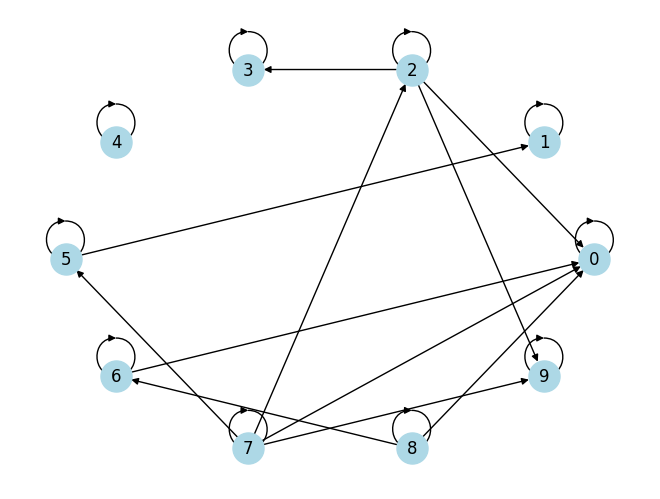

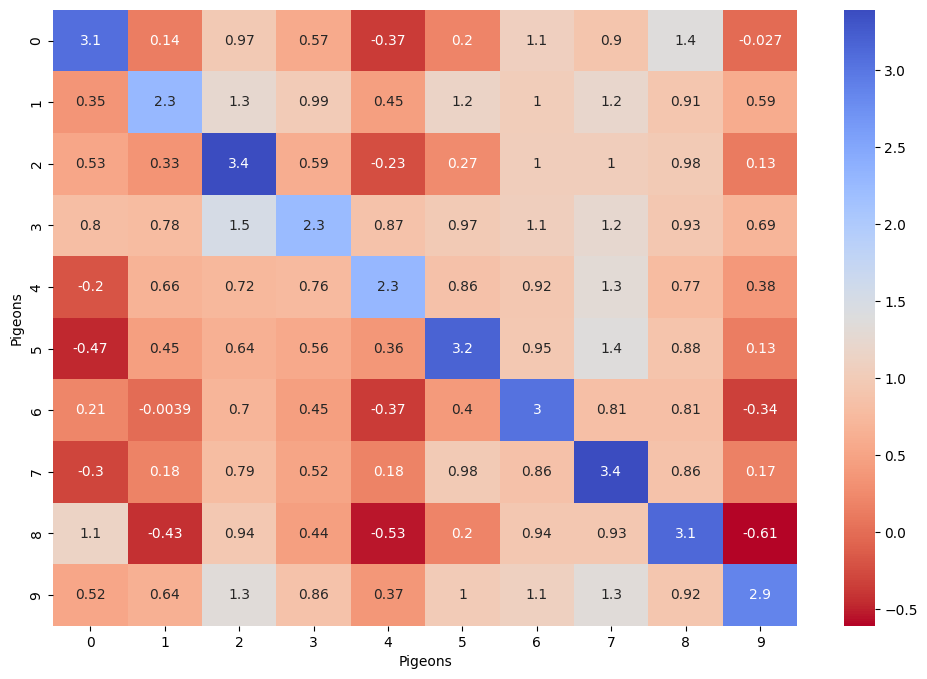

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 3 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 1 descendant nodes.
6 has 1 descendant nodes.
7 has 6 descendant nodes.
8 has 2 descendant nodes.
9 has 0 descendant nodes.
7 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,19.591014,9.92543,14.804048,16.074659,12.95493,9.583554,11.281867,6.60553,11.911254
1,19.591014,0.0,18.844522,18.171985,20.396678,16.999948,19.301406,16.438987,20.293777,15.415442
2,9.92543,18.844522,0.0,11.814591,12.728976,10.060222,8.487529,9.332706,10.866554,9.134807
3,14.804048,18.171985,11.814591,0.0,8.854337,11.101096,12.396928,10.417909,15.615028,7.941647
4,16.074659,20.396678,12.728976,8.854337,0.0,10.564409,13.079561,10.45927,16.860481,10.175441
5,12.95493,16.999948,10.060222,11.101096,10.564409,0.0,11.073075,7.956105,13.636382,8.162827
6,9.583554,19.301406,8.487529,12.396928,13.079561,11.073075,0.0,10.911482,9.803102,9.991957
7,11.281867,16.438987,9.332706,10.417909,10.45927,7.956105,10.911482,0.0,11.386498,7.010463
8,6.60553,20.293777,10.866554,15.615028,16.860481,13.636382,9.803102,11.386498,0.0,12.694672
9,11.911254,15.415442,9.134807,7.941647,10.175441,8.162827,9.991957,7.010463,12.694672,0.0


FREE FLIGHT A3 CAUSAL INFERENCE:


,posx_p0,posy_p0,posz_p0,velx_p0,vely_p0,velz_p0,accx_p0,accy_p0,accz_p0,posx_p1,...,accz_p8,posx_p9,posy_p9,posz_p9,velx_p9,vely_p9,velz_p9,accx_p9,accy_p9,accz_p9
0,-6.5595,2.7071,61.4408,0.0220,-0.1079,0.0558,0.0140,-0.0189,0.0240,-9.7833,...,0.0082,-5.9910,-0.3192,59.7752,-0.0373,0.0131,0.0551,-0.0450,0.0515,0.0134
1,-6.5572,2.6963,61.4465,0.0228,-0.1090,0.0583,0.0030,-0.0034,0.0270,-9.7723,...,0.0085,-5.9950,-0.3176,59.7807,-0.0415,0.0174,0.0563,-0.0381,0.0385,0.0084
2,-6.5549,2.6853,61.4525,0.0227,-0.1088,0.0609,-0.0059,0.0097,0.0267,-9.7610,...,0.0073,-5.9993,-0.3157,59.7864,-0.0452,0.0205,0.0570,-0.0356,0.0215,0.0059
3,-6.5527,2.6745,61.4587,0.0218,-0.1075,0.0633,-0.0119,0.0174,0.0229,-9.7495,...,0.0055,-6.0040,-0.3135,59.7921,-0.0489,0.0223,0.0576,-0.0357,0.0117,0.0048
4,-6.5505,2.6638,61.4651,0.0204,-0.1059,0.0651,-0.0175,0.0166,0.0140,-9.7378,...,0.0045,-6.0091,-0.3112,59.7979,-0.0527,0.0234,0.0582,-0.0398,0.0101,0.0065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18113,18.3061,6.1458,67.4332,0.0251,0.0122,-0.0712,-0.0006,-0.0074,-0.0055,17.0106,...,-0.0041,16.6281,5.8861,67.5410,0.0249,-0.0289,0.0392,0.0091,0.0189,-0.0055
18114,18.3086,6.1469,67.4260,0.0250,0.0120,-0.0718,-0.0006,0.0034,-0.0067,17.0111,...,0.0021,16.6306,5.8833,67.5448,0.0261,-0.0269,0.0383,0.0150,0.0208,-0.0129
18115,18.3110,6.1482,67.4188,0.0246,0.0125,-0.0725,-0.0038,0.0086,-0.0075,17.0116,...,0.0057,16.6333,5.8807,67.5486,0.0274,-0.0252,0.0367,0.0143,0.0153,-0.0181
18116,18.3135,6.1494,67.4115,0.0234,0.0131,-0.0733,-0.0240,0.0062,-0.0105,17.0119,...,0.0120,16.6361,5.8783,67.5522,0.0284,-0.0240,0.0345,0.0065,0.0095,-0.0314


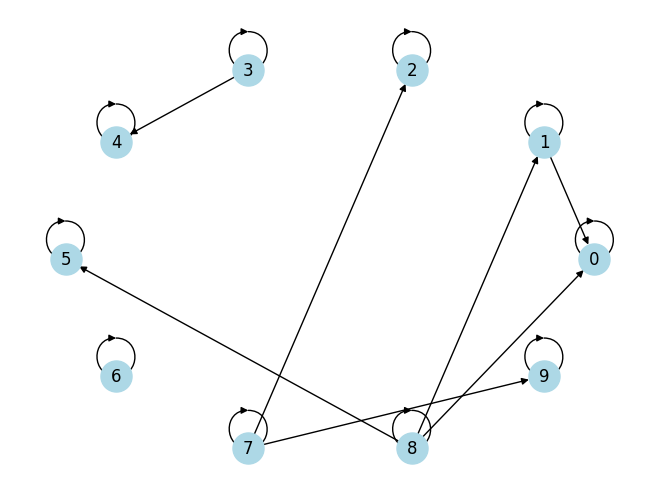

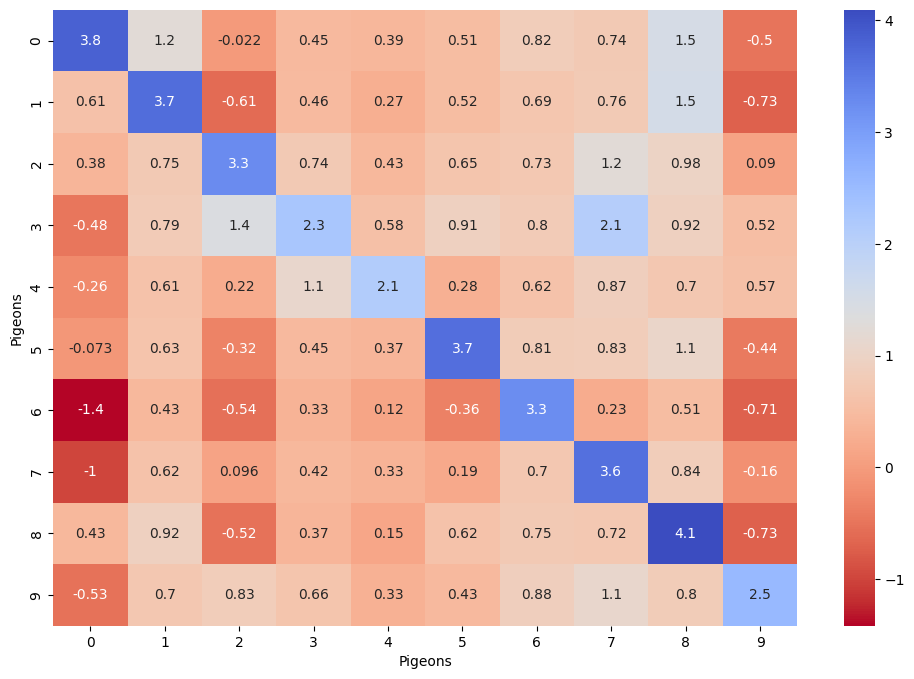

Results:
0 has 0 descendant nodes.
1 has 1 descendant nodes.
2 has 0 descendant nodes.
3 has 1 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 0 descendant nodes.
7 has 2 descendant nodes.
8 has 3 descendant nodes.
9 has 0 descendant nodes.
8 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,6.599347,8.395539,9.299008,17.5626,7.608405,8.064138,7.569605,5.93324,8.915164
1,6.599347,0.0,8.945733,10.389671,18.938616,6.695858,8.521875,8.205661,7.699587,9.461708
2,8.395539,8.945733,0.0,8.828932,14.793247,8.034226,8.781263,7.410765,7.57484,7.753516
3,9.299008,10.389671,8.828932,0.0,15.436565,9.577526,8.757927,7.025615,10.021939,7.51228
4,17.5626,18.938616,14.793247,15.436565,0.0,18.084067,15.871396,15.79794,17.504967,14.240802
5,7.608405,6.695858,8.034226,9.577526,18.084067,0.0,6.556079,8.167925,7.382672,8.799692
6,8.064138,8.521875,8.781263,8.757927,15.871396,6.556079,0.0,7.64323,8.458535,7.545331
7,7.569605,8.205661,7.410765,7.025615,15.79794,8.167925,7.64323,0.0,8.857378,6.811372
8,5.93324,7.699587,7.57484,10.021939,17.504967,7.382672,8.458535,8.857378,0.0,9.494263
9,8.915164,9.461708,7.753516,7.51228,14.240802,8.799692,7.545331,6.811372,9.494263,0.0


FREE FLIGHT A4 CAUSAL INFERENCE:


,posx_p0,posy_p0,posz_p0,velx_p0,vely_p0,velz_p0,accx_p0,accy_p0,accz_p0,posx_p1,...,accz_p8,posx_p9,posy_p9,posz_p9,velx_p9,vely_p9,velz_p9,accx_p9,accy_p9,accz_p9
0,-5.1004,-2.6829,61.7192,-0.0137,0.0115,-0.0149,-0.0130,0.0006,-0.0015,-6.4301,...,-0.0094,-8.8417,2.4014,62.7820,0.0228,-0.0396,-0.0009,-0.0143,0.0156,0.0044
1,-5.1018,-2.6818,61.7177,-0.0148,0.0120,-0.0150,-0.0087,0.0094,-0.0006,-6.3916,...,-0.0026,-8.8395,2.3975,62.7820,0.0215,-0.0370,-0.0008,-0.0155,0.0443,-0.0021
2,-5.1034,-2.6805,61.7162,-0.0157,0.0133,-0.0151,-0.0076,0.0174,-0.0015,-6.3571,...,0.0059,-8.8374,2.3940,62.7819,0.0204,-0.0326,-0.0012,-0.0073,0.0496,-0.0076
3,-5.1050,-2.6791,61.7147,-0.0166,0.0150,-0.0153,-0.0103,0.0195,-0.0025,-6.3264,...,0.0118,-8.8354,2.3910,62.7817,0.0199,-0.0274,-0.0022,-0.0011,0.0531,-0.0121
4,-5.1067,-2.6775,61.7132,-0.0178,0.0168,-0.0156,-0.0135,0.0176,-0.0035,-6.2993,...,0.0124,-8.8334,2.3885,62.7814,0.0197,-0.0221,-0.0035,-0.0017,0.0551,-0.0146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17238,11.2659,10.5621,66.5194,-0.0027,0.0088,0.0078,0.0323,0.0028,-0.0184,10.2691,...,-0.0270,8.4789,16.1529,68.9569,0.0027,-0.0624,-0.0211,0.0425,-0.0013,-0.0083
17239,11.2658,10.5630,66.5201,0.0005,0.0089,0.0058,0.0339,-0.0014,-0.0236,10.2883,...,-0.0248,8.4794,16.1467,68.9547,0.0065,-0.0628,-0.0220,0.0362,-0.0064,-0.0106
17240,11.2660,10.5639,66.5206,0.0034,0.0086,0.0038,0.0269,-0.0047,-0.0189,10.3070,...,-0.0158,8.4802,16.1404,68.9525,0.0093,-0.0637,-0.0230,0.0211,-0.0120,-0.0102
17241,11.2665,10.5648,66.5209,0.0056,0.0080,0.0023,0.0169,-0.0073,-0.0109,10.3251,...,-0.0056,8.4812,16.1340,68.9501,0.0106,-0.0650,-0.0238,0.0044,-0.0157,-0.0075


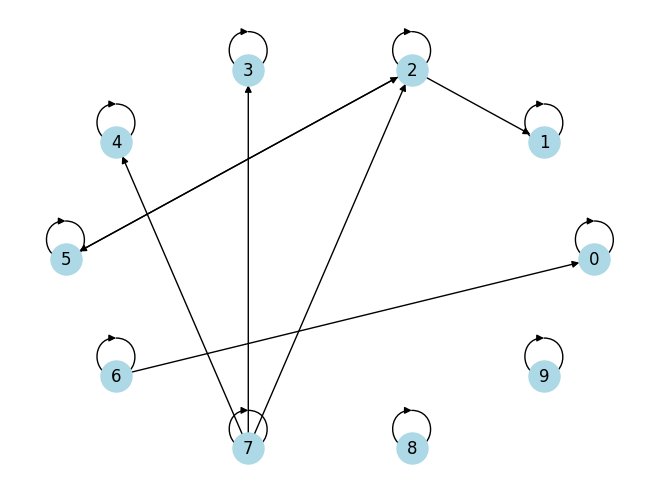

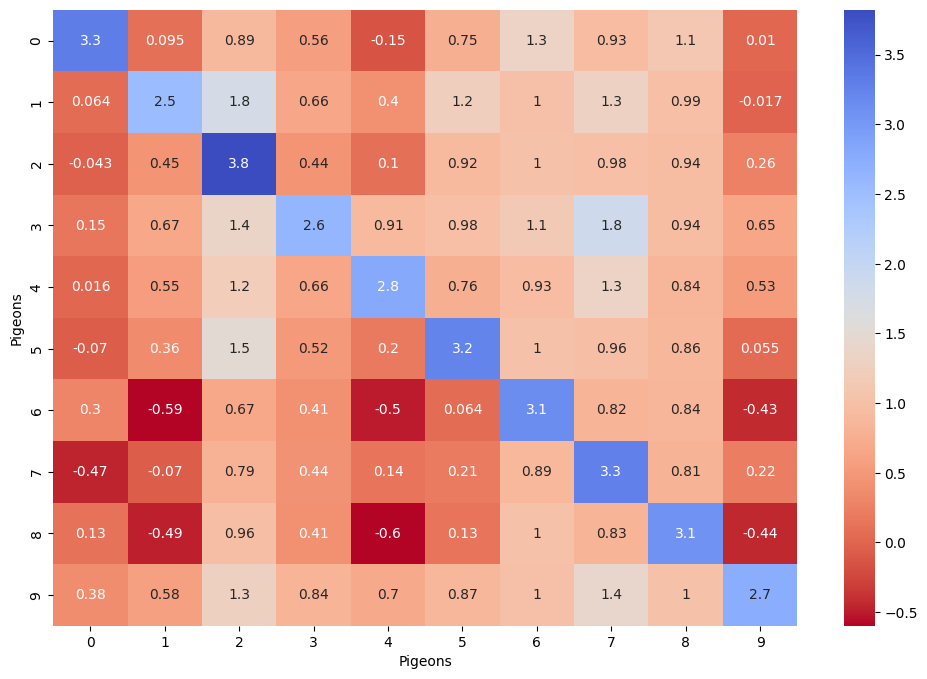

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 2 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 2 descendant nodes.
6 has 1 descendant nodes.
7 has 5 descendant nodes.
8 has 0 descendant nodes.
9 has 0 descendant nodes.
7 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,6.723056,7.64485,8.722434,8.894917,8.021234,6.61877,7.774634,7.133081,8.169916
1,6.723056,0.0,7.134824,8.917281,7.755903,7.335639,8.239724,6.582791,8.022532,7.702715
2,7.64485,7.134824,0.0,7.668283,8.300109,7.412395,8.802145,8.441106,9.177456,7.416774
3,8.722434,8.917281,7.668283,0.0,7.020779,8.876721,10.432208,7.076001,10.714055,5.979979
4,8.894917,7.755903,8.300109,7.020779,0.0,9.963373,9.827848,6.488492,10.527147,5.998309
5,8.021234,7.335639,7.412395,8.876721,9.963373,0.0,10.621682,9.571645,9.124364,9.154609
6,6.61877,8.239724,8.802145,10.432208,9.827848,10.621682,0.0,8.295534,8.309506,9.851019
7,7.774634,6.582791,8.441106,7.076001,6.488492,9.571645,8.295534,0.0,9.147898,6.542848
8,7.133081,8.022532,9.177456,10.714055,10.527147,9.124364,8.309506,9.147898,0.0,10.141494
9,8.169916,7.702715,7.416774,5.979979,5.998309,9.154609,9.851019,6.542848,10.141494,0.0


FREE FLIGHT A5 CAUSAL INFERENCE:


,posx_p0,posy_p0,posz_p0,velx_p0,vely_p0,velz_p0,accx_p0,accy_p0,accz_p0,posx_p1,...,accz_p8,posx_p9,posy_p9,posz_p9,velx_p9,vely_p9,velz_p9,accx_p9,accy_p9,accz_p9
0,-2.7166,-1.8262,59.7382,-0.0530,-0.0353,0.0396,0.0617,-0.0834,-0.0414,-3.9158,...,-0.0115,-5.7113,3.3052,62.2508,0.0462,-0.0805,0.0534,-0.0312,-0.0798,0.0652
1,-2.7216,-1.8302,59.7420,-0.0470,-0.0429,0.0355,0.0620,-0.0680,-0.0407,-3.9163,...,-0.0123,-5.7069,3.2967,62.2564,0.0435,-0.0888,0.0601,-0.0255,-0.0855,0.0708
2,-2.7260,-1.8348,59.7453,-0.0413,-0.0489,0.0319,0.0532,-0.0509,-0.0343,-3.9167,...,-0.0113,-5.7027,3.2874,62.2628,0.0413,-0.0973,0.0668,-0.0167,-0.0867,0.0666
3,-2.7299,-1.8400,59.7483,-0.0362,-0.0535,0.0290,0.0476,-0.0388,-0.0236,-3.9171,...,-0.0093,-5.6986,3.2773,62.2698,0.0394,-0.1055,0.0720,-0.0168,-0.0799,0.0431
4,-2.7332,-1.8455,59.7511,-0.0311,-0.0573,0.0272,0.0509,-0.0359,-0.0119,-3.9172,...,-0.0069,-5.6948,3.2663,62.2772,0.0364,-0.1131,0.0742,-0.0370,-0.0714,0.0046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201,10.2445,11.2728,69.4090,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,19.2262,...,0.0000,22.3581,11.9515,55.0230,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
31202,10.2445,11.2728,69.4090,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,19.2262,...,-0.0000,22.3581,11.9515,55.0230,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
31203,10.2445,11.2728,69.4090,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,19.2262,...,0.0000,22.3581,11.9515,55.0230,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
31204,10.2445,11.2728,69.4090,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,19.2262,...,-0.0000,22.3581,11.9515,55.0230,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000


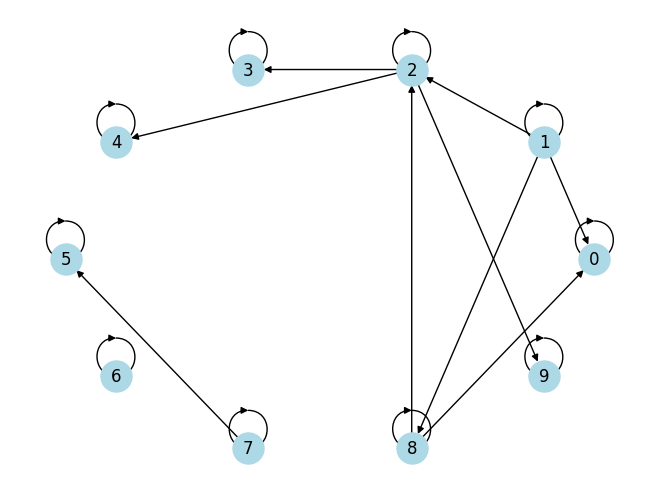

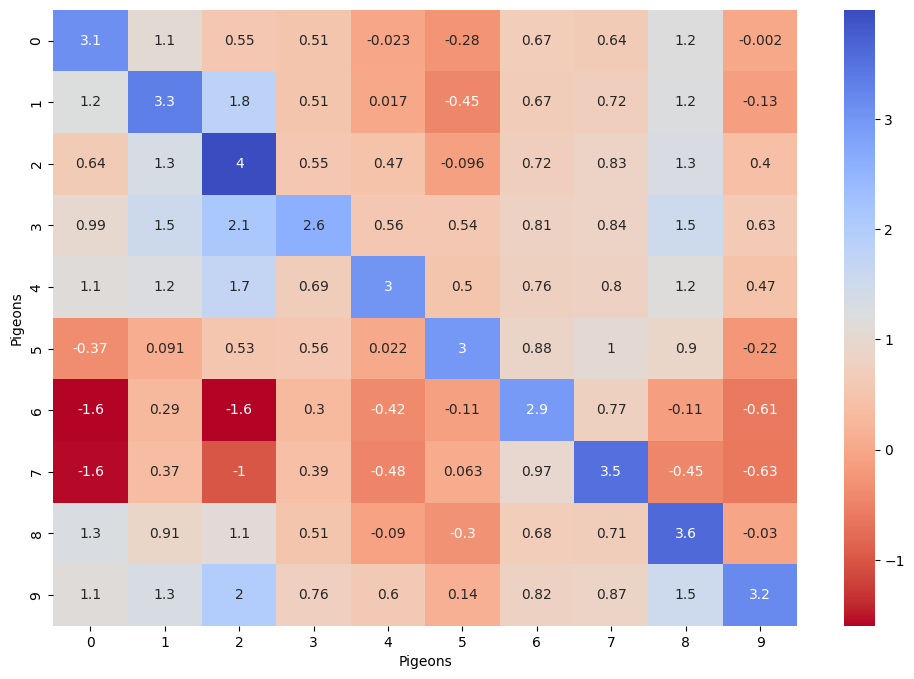

Results:
0 has 0 descendant nodes.
1 has 6 descendant nodes.
2 has 3 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 0 descendant nodes.
7 has 1 descendant nodes.
8 has 5 descendant nodes.
9 has 0 descendant nodes.
1 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,10.134288,9.8664,16.605954,11.636593,16.894467,16.687238,18.390781,14.771575,13.61373
1,10.134288,0.0,7.543147,12.95242,8.92019,16.246172,17.524622,17.220435,15.585301,12.20145
2,9.8664,7.543147,0.0,12.280527,8.455628,14.560448,15.486175,15.074671,13.688856,10.846572
3,16.605954,12.95242,12.280527,0.0,12.387301,16.851837,17.943774,17.894736,16.715533,14.62197
4,11.636593,8.92019,8.455628,12.387301,0.0,16.987337,17.517485,17.687685,16.818396,12.165307
5,16.894467,16.246172,14.560448,16.851837,16.987337,0.0,9.871264,9.530131,15.207605,15.389172
6,16.687238,17.524622,15.486175,17.943774,17.517485,9.871264,0.0,7.945278,15.701219,15.730163
7,18.390781,17.220435,15.074671,17.894736,17.687685,9.530131,7.945278,0.0,16.854558,16.651202
8,14.771575,15.585301,13.688856,16.715533,16.818396,15.207605,15.701219,16.854558,0.0,16.496403
9,13.61373,12.20145,10.846572,14.62197,12.165307,15.389172,15.730163,16.651202,16.496403,0.0


In [ ]:
for i in range(1,6):
    print(f"FREE FLIGHT A{i} CAUSAL INFERENCE:")
    fname=f"Data/n10/ffA{i}.csv"
    df = pd.read_csv(fname).iloc[:,1:]
    display(df)
    n = df.shape[-1]//9
    df = df.iloc[:,flatten_tuple_list([(9*x+3, 9*y+3+1, 9*z+3+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df = df.iloc[:,:]
    
    res=runCausality(df)
    G =  res[2]
    determine_leader2(G)

    df_pos = pd.read_csv(fname).iloc[:,1:]
    n = df_pos.shape[-1]//9
    df_pos = df_pos.iloc[:,flatten_tuple_list([(9*x, 9*y+1, 9*z+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df_pos = df_pos.iloc[:,:]

    display(average_dist(df_pos))

FREE FLIGHT B1 CAUSAL INFERENCE:


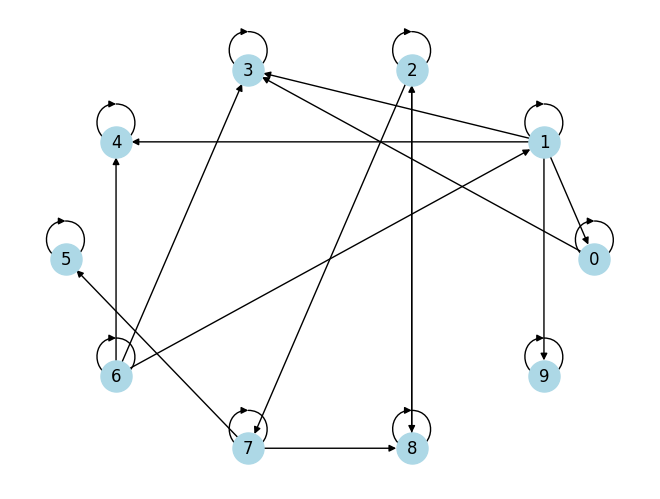

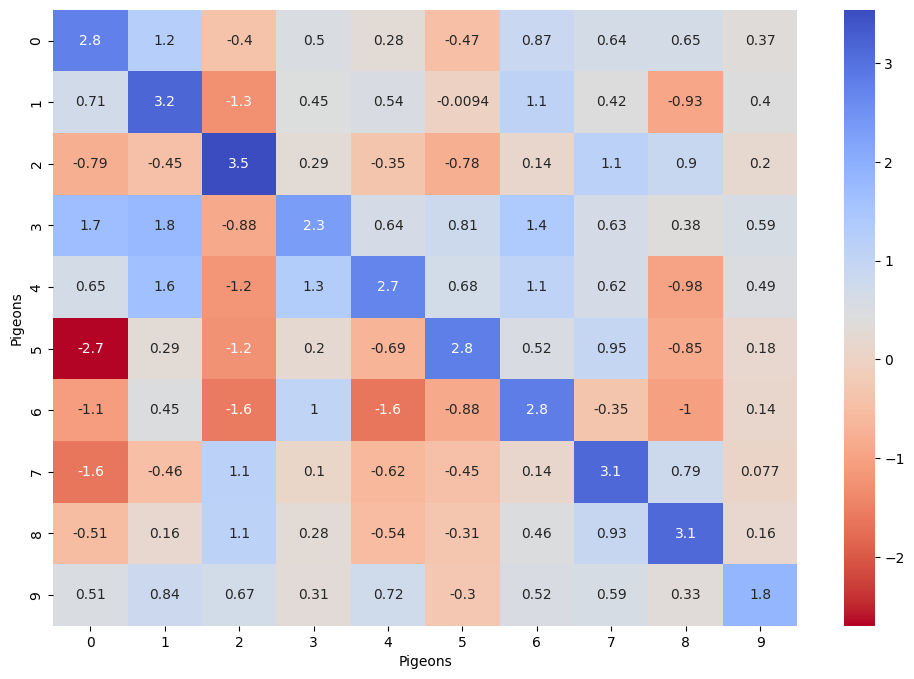

Results:
0 has 1 descendant nodes.
1 has 4 descendant nodes.
2 has 3 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 5 descendant nodes.
7 has 3 descendant nodes.
8 has 3 descendant nodes.
9 has 0 descendant nodes.
6 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,9.554135,20.227658,12.041476,9.525542,11.686442,10.805374,12.438705,19.06093,40.899878
1,9.554135,0.0,20.792485,8.363417,7.941216,10.648984,6.587703,13.818123,19.836993,39.897406
2,20.227658,20.792485,0.0,21.996912,22.670621,19.226251,22.453215,15.572654,8.326624,52.769151
3,12.041476,8.363417,21.996912,0.0,9.974722,10.426478,8.102796,14.872303,20.413346,41.325339
4,9.525542,7.941216,22.670621,9.974722,0.0,9.900436,8.631106,14.198437,21.790894,38.811393
5,11.686442,10.648984,19.226251,10.426478,9.900436,0.0,11.08304,9.820994,18.90557,40.186488
6,10.805374,6.587703,22.453215,8.102796,8.631106,11.08304,0.0,14.767099,21.169562,40.253674
7,12.438705,13.818123,15.572654,14.872303,14.198437,9.820994,14.767099,0.0,15.776726,42.396565
8,19.06093,19.836993,8.326624,20.413346,21.790894,18.90557,21.169562,15.776726,0.0,52.903404
9,40.899878,39.897406,52.769151,41.325339,38.811393,40.186488,40.253674,42.396565,52.903404,0.0


FREE FLIGHT B2 CAUSAL INFERENCE:


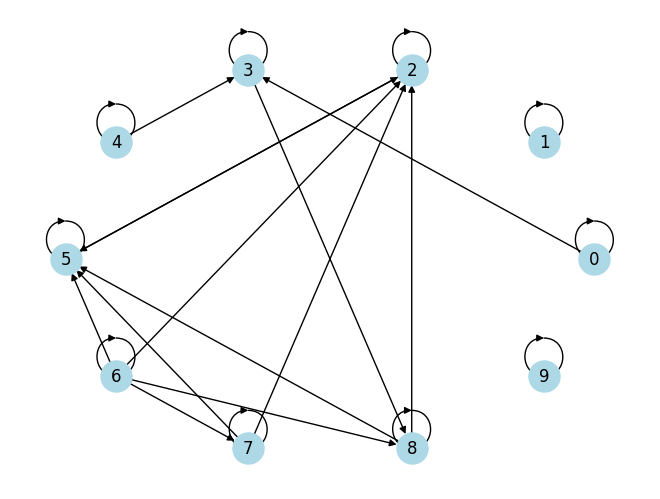

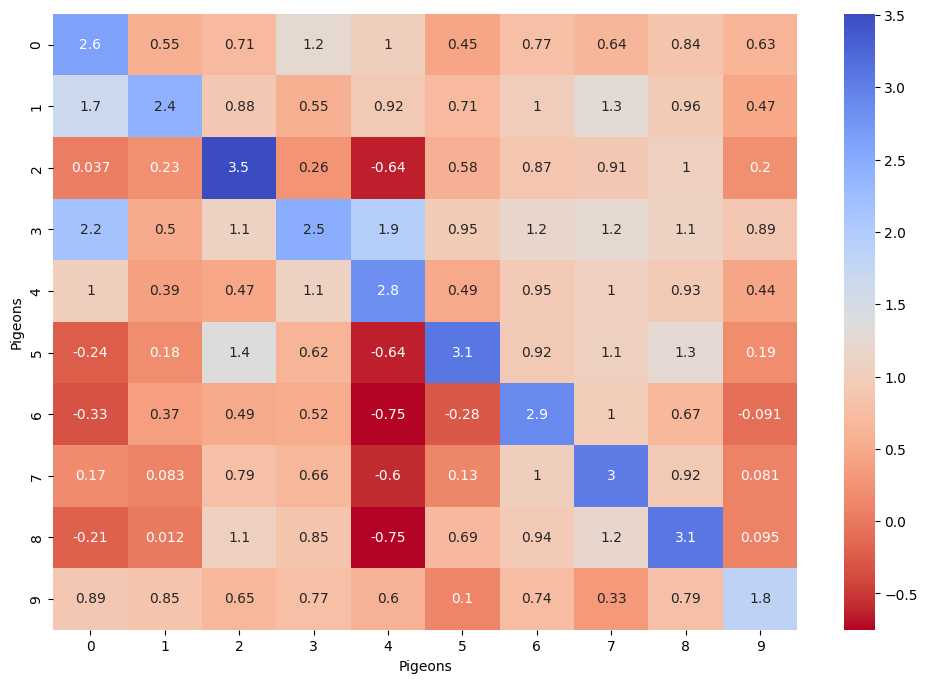

Results:
0 has 4 descendant nodes.
1 has 0 descendant nodes.
2 has 1 descendant nodes.
3 has 3 descendant nodes.
4 has 4 descendant nodes.
5 has 1 descendant nodes.
6 has 4 descendant nodes.
7 has 2 descendant nodes.
8 has 2 descendant nodes.
9 has 0 descendant nodes.
0 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,9.528048,12.071107,8.497613,9.086676,12.849246,10.142901,10.218212,10.461629,10.732747
1,9.528048,0.0,9.932273,7.420313,6.318546,11.600031,8.418398,9.523908,8.776473,12.200263
2,12.071107,9.932273,0.0,10.237974,9.628056,8.59263,8.455115,9.042014,6.885592,14.540369
3,8.497613,7.420313,10.237974,0.0,7.522639,10.875207,8.320002,9.879054,9.108757,11.008425
4,9.086676,6.318546,9.628056,7.522639,0.0,10.364898,7.988585,7.823544,7.920353,10.421301
5,12.849246,11.600031,8.59263,10.875207,10.364898,0.0,10.094522,8.304776,7.07161,15.123674
6,10.142901,8.418398,8.455115,8.320002,7.988585,10.094522,0.0,7.817157,7.623608,12.665488
7,10.218212,9.523908,9.042014,9.879054,7.823544,8.304776,7.817157,0.0,7.108313,13.071877
8,10.461629,8.776473,6.885592,9.108757,7.920353,7.07161,7.623608,7.108313,0.0,13.20836
9,10.732747,12.200263,14.540369,11.008425,10.421301,15.123674,12.665488,13.071877,13.20836,0.0


FREE FLIGHT B3 CAUSAL INFERENCE:


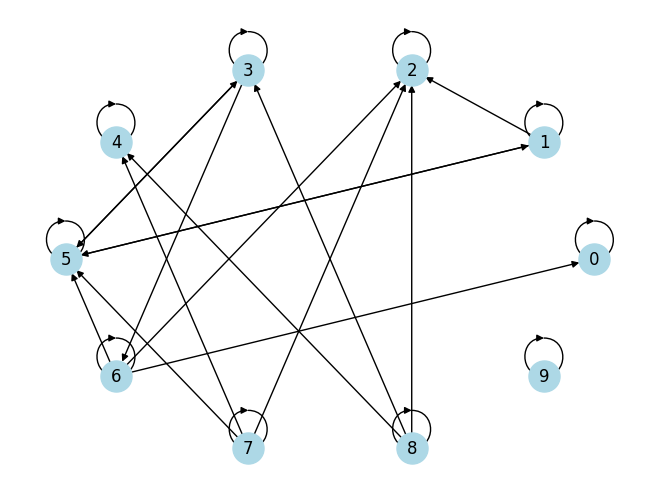

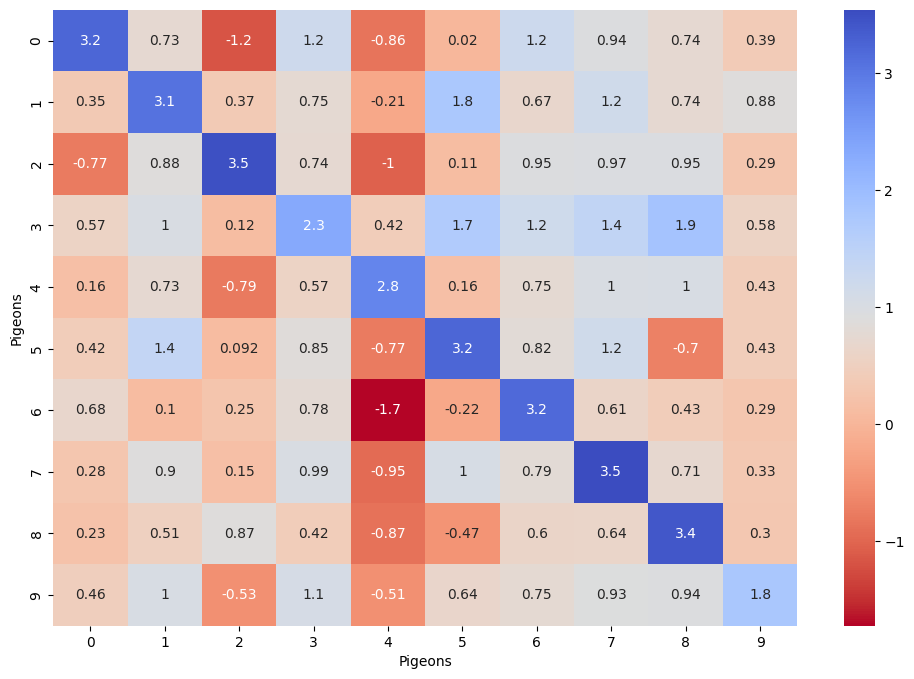

Results:
0 has 0 descendant nodes.
1 has 5 descendant nodes.
2 has 0 descendant nodes.
3 has 5 descendant nodes.
4 has 0 descendant nodes.
5 has 5 descendant nodes.
6 has 5 descendant nodes.
7 has 7 descendant nodes.
8 has 7 descendant nodes.
9 has 0 descendant nodes.
7 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,9.426363,9.728115,9.216232,7.51805,8.505807,7.916132,7.947238,10.567668,11.330606
1,9.426363,0.0,10.026407,10.39079,9.641585,7.175618,10.295268,8.397723,11.876685,11.514182
2,9.728115,10.026407,0.0,10.297655,9.766123,9.135168,8.480163,7.55648,10.203045,11.012892
3,9.216232,10.39079,10.297655,0.0,8.484487,10.495933,9.316002,9.336885,9.227947,13.052621
4,7.51805,9.641585,9.766123,8.484487,0.0,9.69035,8.53595,8.233109,9.416075,11.426275
5,8.505807,7.175618,9.135168,10.495933,9.69035,0.0,9.196686,7.527898,11.714014,11.873429
6,7.916132,10.295268,8.480163,9.316002,8.53595,9.196686,0.0,7.808748,11.111904,10.188914
7,7.947238,8.397723,7.55648,9.336885,8.233109,7.527898,7.808748,0.0,10.847836,10.262857
8,10.567668,11.876685,10.203045,9.227947,9.416075,11.714014,11.111904,10.847836,0.0,12.111699
9,11.330606,11.514182,11.012892,13.052621,11.426275,11.873429,10.188914,10.262857,12.111699,0.0


FREE FLIGHT B4 CAUSAL INFERENCE:


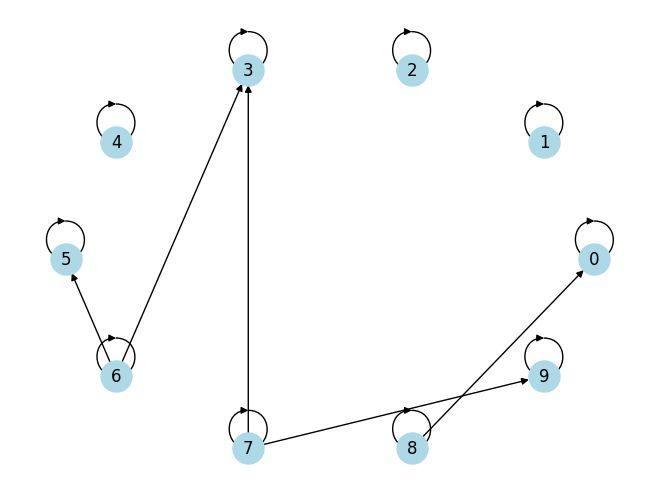

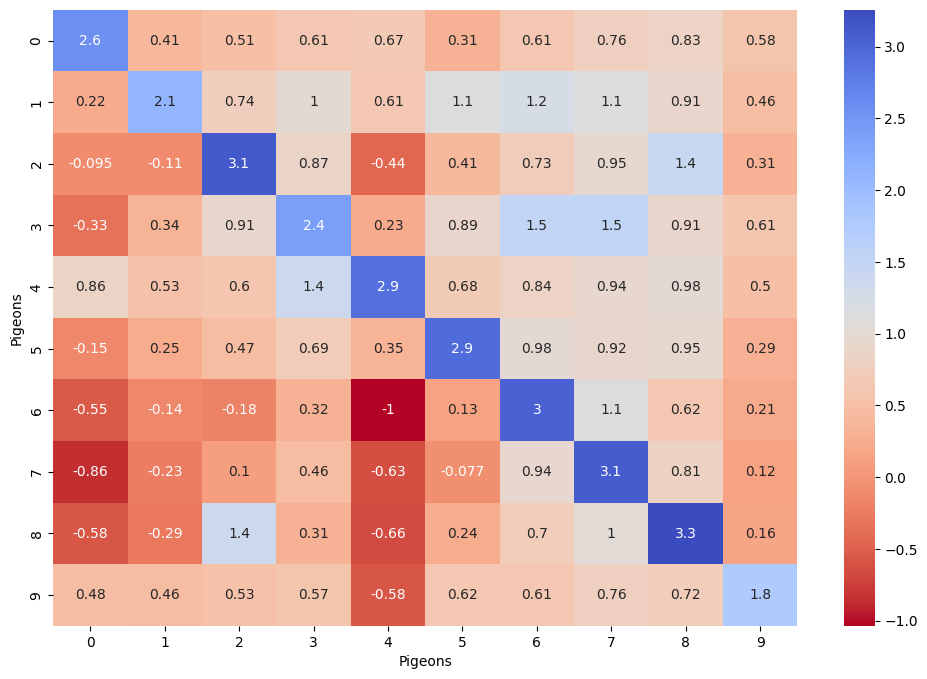

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 0 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 2 descendant nodes.
7 has 2 descendant nodes.
8 has 1 descendant nodes.
9 has 0 descendant nodes.
6 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,15.722637,18.946451,17.338453,14.474706,15.290687,16.708273,17.289763,17.899793,18.662324
1,15.722637,0.0,14.480172,10.043926,10.42235,9.18365,8.555865,9.868863,12.878314,17.704165
2,18.946451,14.480172,0.0,13.845403,16.003342,12.479904,15.953337,13.915417,7.130372,23.985024
3,17.338453,10.043926,13.845403,0.0,11.416498,8.287001,6.710346,7.308451,11.84732,17.129795
4,14.474706,10.42235,16.003342,11.416498,0.0,9.808291,12.120218,12.26585,14.04915,19.613349
5,15.290687,9.18365,12.479904,8.287001,9.808291,0.0,10.062366,10.983847,10.062285,18.816356
6,16.708273,8.555865,15.953337,6.710346,12.120218,10.062366,0.0,7.605276,14.477206,16.411996
7,17.289763,9.868863,13.915417,7.308451,12.26585,10.983847,7.605276,0.0,12.370411,17.14719
8,17.899793,12.878314,7.130372,11.84732,14.04915,10.062285,14.477206,12.370411,0.0,22.905655
9,18.662324,17.704165,23.985024,17.129795,19.613349,18.816356,16.411996,17.14719,22.905655,0.0


FREE FLIGHT B5 CAUSAL INFERENCE:


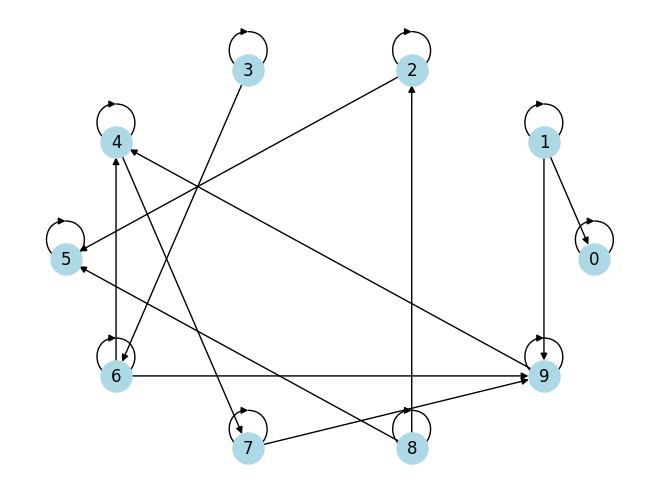

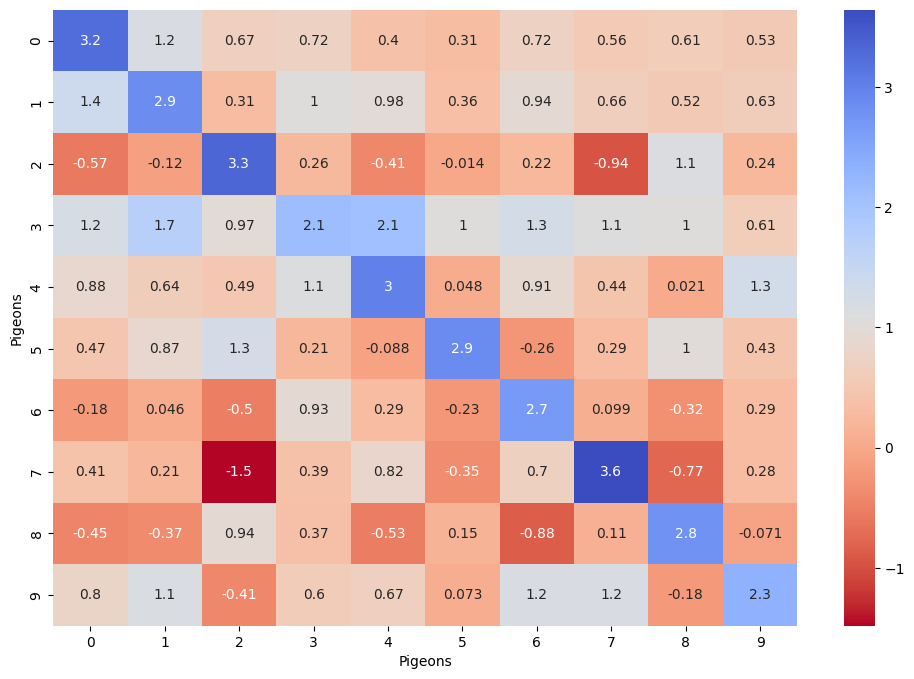

Results:
0 has 0 descendant nodes.
1 has 4 descendant nodes.
2 has 1 descendant nodes.
3 has 4 descendant nodes.
4 has 2 descendant nodes.
5 has 0 descendant nodes.
6 has 3 descendant nodes.
7 has 2 descendant nodes.
8 has 2 descendant nodes.
9 has 2 descendant nodes.
1 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,5.660214,19.654295,10.954331,7.260858,18.300691,11.330819,11.576866,21.463116,9.305341
1,5.660214,0.0,20.817912,8.960859,6.665506,19.715201,10.554768,10.716183,22.025636,8.277583
2,19.654295,20.817912,0.0,19.120355,20.046009,10.716734,21.576471,21.894121,9.023666,18.965305
3,10.954331,8.960859,19.120355,0.0,7.589012,19.164067,10.824209,9.859168,20.348522,5.29339
4,7.260858,6.665506,20.046009,7.589012,0.0,20.14508,8.031928,10.701541,21.896993,7.002331
5,18.300691,19.715201,10.716734,19.164067,20.14508,0.0,22.137509,20.87161,12.344479,18.969142
6,11.330819,10.554768,21.576471,10.824209,8.031928,22.137509,0.0,14.83568,22.815524,10.517202
7,11.576866,10.716183,21.894121,9.859168,10.701541,20.87161,14.83568,0.0,22.654673,10.063281
8,21.463116,22.025636,9.023666,20.348522,21.896993,12.344479,22.815524,22.654673,0.0,20.928275
9,9.305341,8.277583,18.965305,5.29339,7.002331,18.969142,10.517202,10.063281,20.928275,0.0


In [ ]:
for i in range(1,6):
    print(f"FREE FLIGHT B{i} CAUSAL INFERENCE:")
    fname=f"Data/n10/ffB{i}.csv"
    df = pd.read_csv(fname).iloc[:,1:]
    n = df.shape[-1]//9
    df = df.iloc[:,flatten_tuple_list([(9*x+3, 9*y+3+1, 9*z+3+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df = df.iloc[:,:]
    
    res=runCausality(df)
    G =  res[2]
    determine_leader2(G)

    df_pos = pd.read_csv(fname).iloc[:,1:]
    n = df_pos.shape[-1]//9
    df_pos = df_pos.iloc[:,flatten_tuple_list([(9*x, 9*y+1, 9*z+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df_pos = df_pos.iloc[:,:]

    display(average_dist(df_pos))

FREE FLIGHT C1 CAUSAL INFERENCE:


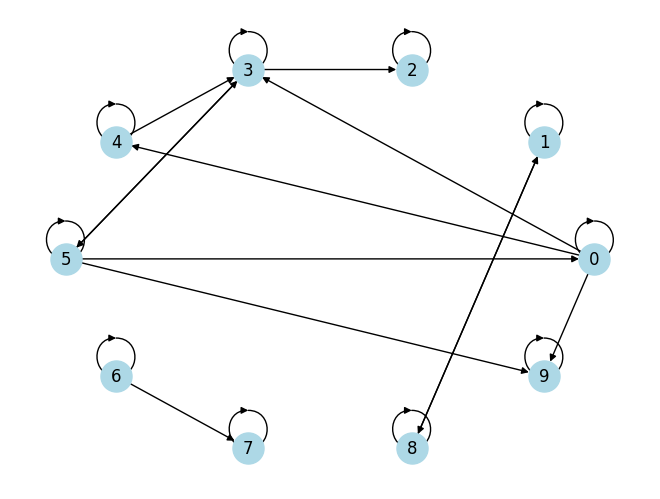

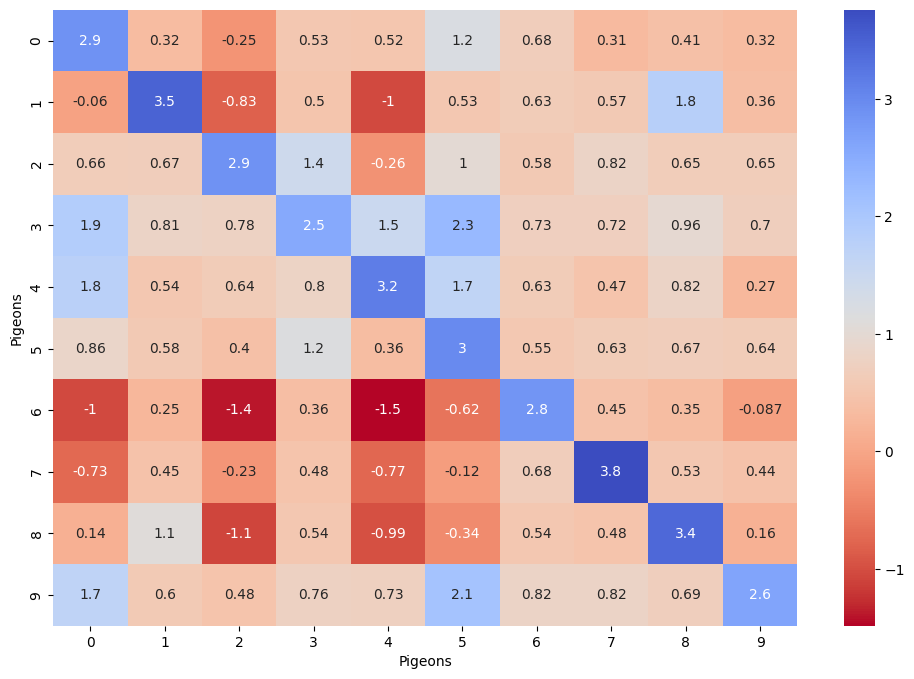

Results:
0 has 5 descendant nodes.
1 has 1 descendant nodes.
2 has 0 descendant nodes.
3 has 5 descendant nodes.
4 has 5 descendant nodes.
5 has 5 descendant nodes.
6 has 1 descendant nodes.
7 has 0 descendant nodes.
8 has 1 descendant nodes.
9 has 0 descendant nodes.
0 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,51.512129,50.502461,50.181936,46.914187,48.575266,49.273697,50.307286,49.56842,45.132708
1,51.512129,0.0,14.632482,14.802737,13.158719,13.289691,11.027094,9.499339,5.769487,14.235523
2,50.502461,14.632482,0.0,9.00078,9.74119,10.234112,17.47366,14.587547,13.900111,13.628285
3,50.181936,14.802737,9.00078,0.0,7.915706,9.020466,17.222069,15.412671,14.932299,12.806812
4,46.914187,13.158719,9.74119,7.915706,0.0,6.598688,14.052541,12.910642,12.400123,10.171177
5,48.575266,13.289691,10.234112,9.020466,6.598688,0.0,14.451747,12.129838,12.941063,11.28217
6,49.273697,11.027094,17.47366,17.222069,14.052541,14.451747,0.0,10.705136,10.094546,13.366929
7,50.307286,9.499339,14.587547,15.412671,12.910642,12.129838,10.705136,0.0,8.903832,13.433779
8,49.56842,5.769487,13.900111,14.932299,12.400123,12.941063,10.094546,8.903832,0.0,12.862507
9,45.132708,14.235523,13.628285,12.806812,10.171177,11.28217,13.366929,13.433779,12.862507,0.0


FREE FLIGHT C2 CAUSAL INFERENCE:


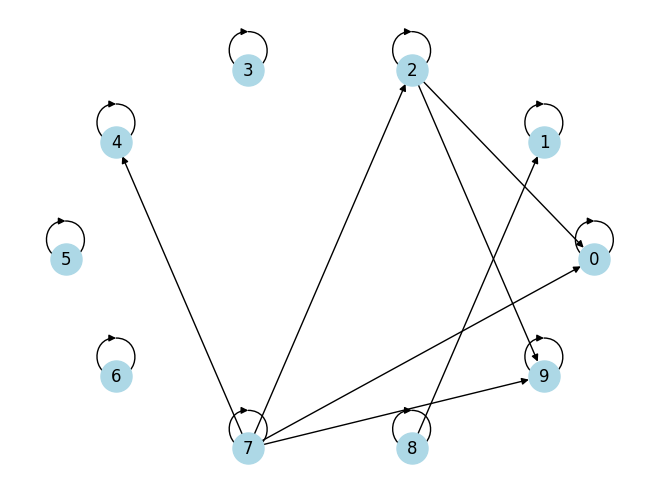

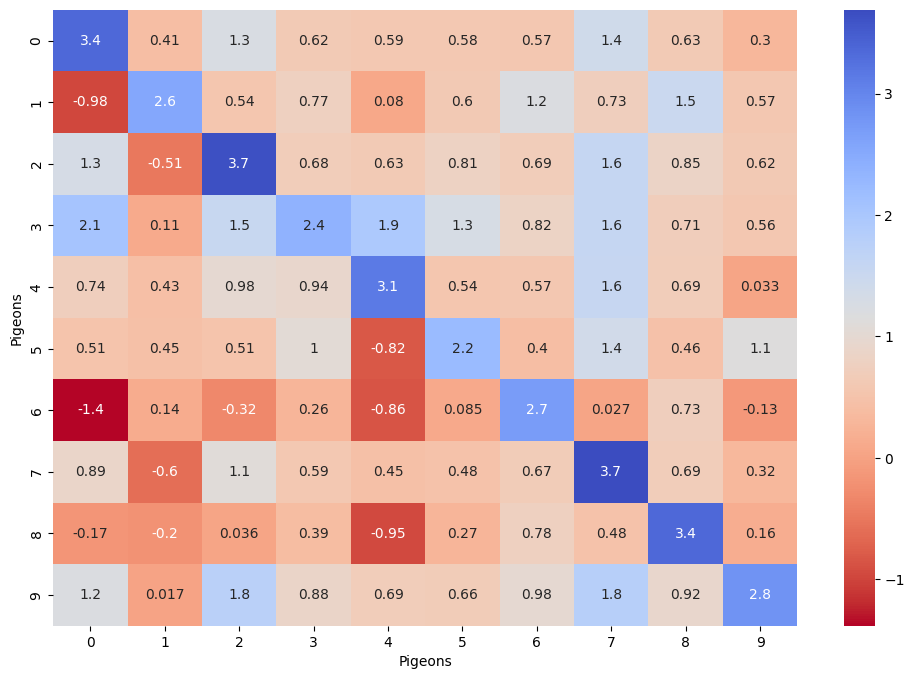

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 2 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 0 descendant nodes.
7 has 4 descendant nodes.
8 has 1 descendant nodes.
9 has 0 descendant nodes.
7 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,19.747073,7.776402,8.132949,9.090623,13.428142,20.126471,9.622494,20.429415,14.684986
1,19.747073,0.0,20.200361,20.695836,21.352659,26.579147,8.2164,21.039235,12.803694,20.625906
2,7.776402,20.200361,0.0,10.952433,11.157086,11.471833,19.818365,6.810584,21.096637,13.350661
3,8.132949,20.695836,10.952433,0.0,11.414844,13.714298,20.193139,12.451693,22.577066,15.602098
4,9.090623,21.352659,11.157086,11.414844,0.0,16.895334,22.241646,13.011747,21.293841,17.132396
5,13.428142,26.579147,11.471833,13.714298,16.895334,0.0,25.194526,10.930732,27.349022,19.301607
6,20.126471,8.2164,19.818365,20.193139,22.241646,25.194526,0.0,20.186833,13.992024,20.005262
7,9.622494,21.039235,6.810584,12.451693,13.011747,10.930732,20.186833,0.0,22.561138,14.023947
8,20.429415,12.803694,21.096637,22.577066,21.293841,27.349022,13.992024,22.561138,0.0,23.32011
9,14.684986,20.625906,13.350661,15.602098,17.132396,19.301607,20.005262,14.023947,23.32011,0.0


FREE FLIGHT C3 CAUSAL INFERENCE:


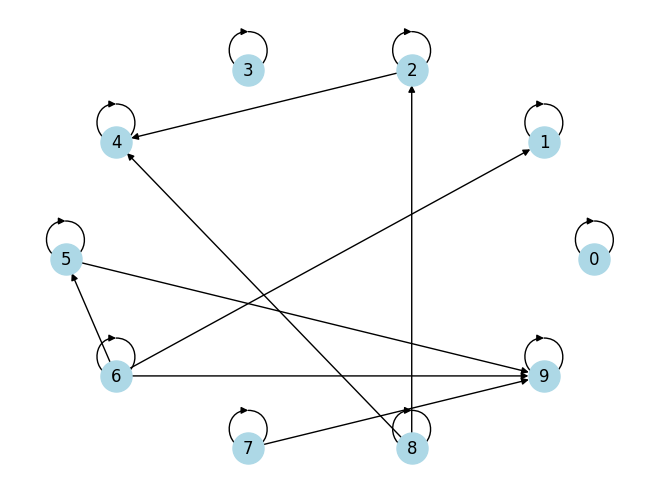

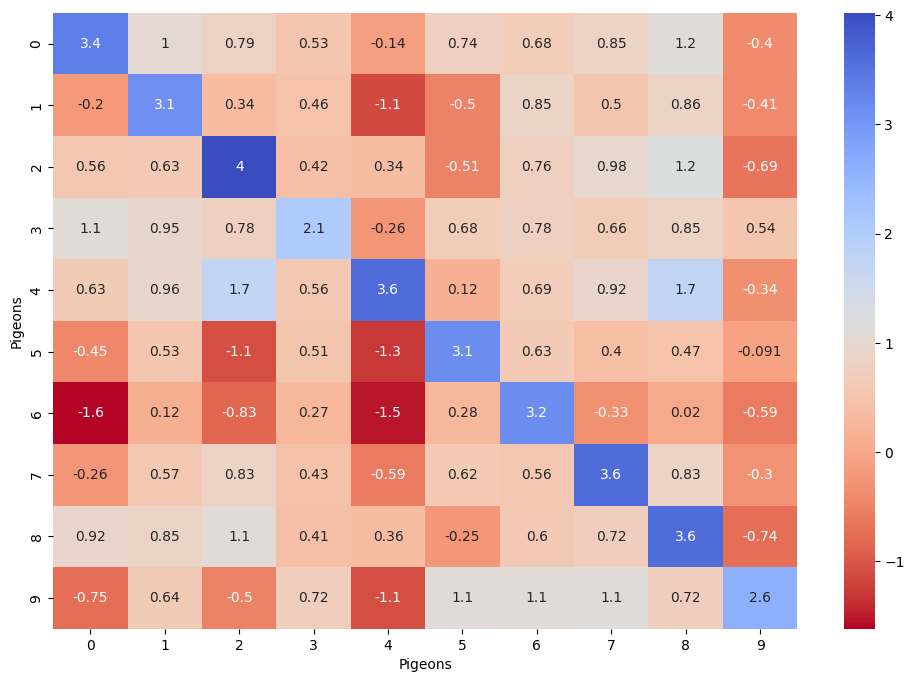

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 1 descendant nodes.
3 has 0 descendant nodes.
4 has 0 descendant nodes.
5 has 1 descendant nodes.
6 has 3 descendant nodes.
7 has 1 descendant nodes.
8 has 2 descendant nodes.
9 has 0 descendant nodes.
6 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,10.78743,7.490423,13.003913,7.142789,10.27564,12.221431,10.294712,9.020847,12.907544
1,10.78743,0.0,12.966045,15.122655,11.578237,11.910952,10.221094,13.492786,11.700248,11.601121
2,7.490423,12.966045,0.0,16.133311,7.779083,13.076298,11.645704,9.313874,10.45539,13.69294
3,13.003913,15.122655,16.133311,0.0,14.552724,16.984821,16.971691,16.949877,16.77355,16.783095
4,7.142789,11.578237,7.779083,14.552724,0.0,12.281037,12.960242,10.706706,8.824264,14.009909
5,10.27564,11.910952,13.076298,16.984821,12.281037,0.0,10.687164,11.226856,13.51926,9.678291
6,12.221431,10.221094,11.645704,16.971691,12.960242,10.687164,0.0,12.715774,14.139179,10.203818
7,10.294712,13.492786,9.313874,16.949877,10.706706,11.226856,12.715774,0.0,13.107659,10.565793
8,9.020847,11.700248,10.45539,16.77355,8.824264,13.51926,14.139179,13.107659,0.0,14.731268
9,12.907544,11.601121,13.69294,16.783095,14.009909,9.678291,10.203818,10.565793,14.731268,0.0


FREE FLIGHT C4 CAUSAL INFERENCE:


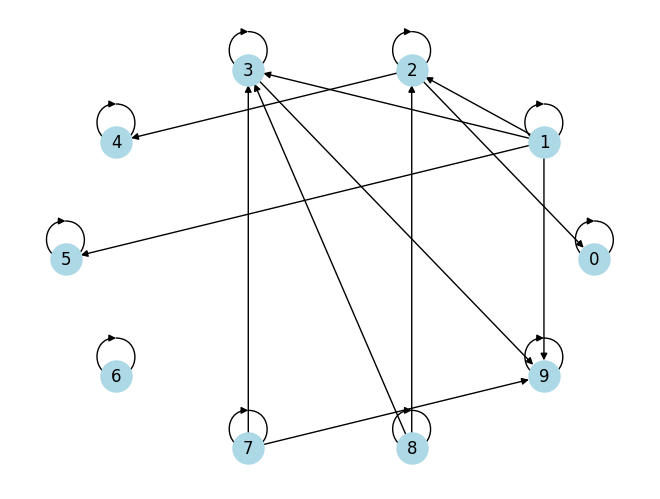

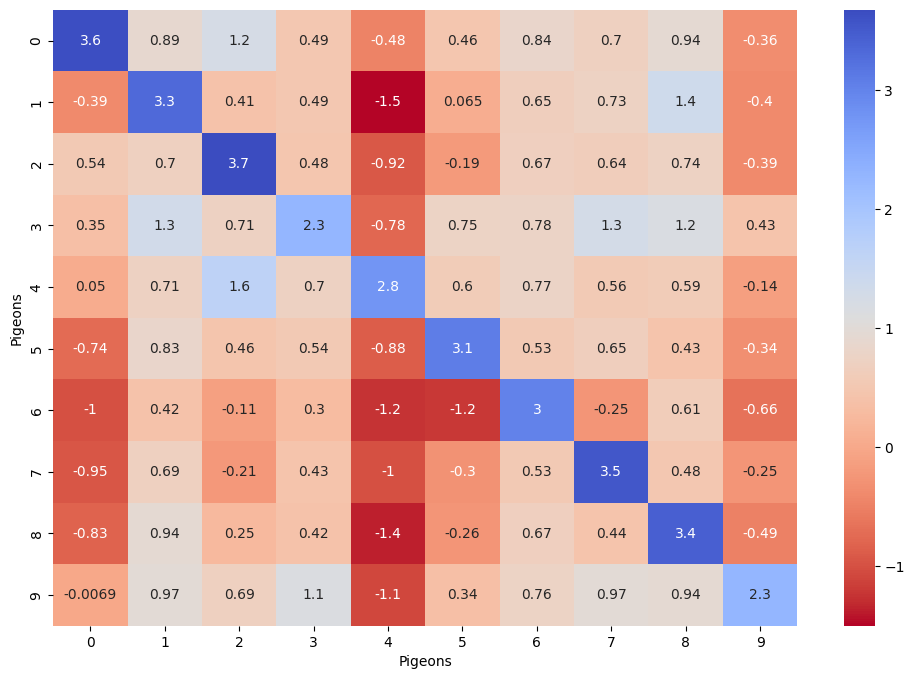

Results:
0 has 0 descendant nodes.
1 has 6 descendant nodes.
2 has 2 descendant nodes.
3 has 1 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 0 descendant nodes.
7 has 2 descendant nodes.
8 has 5 descendant nodes.
9 has 0 descendant nodes.
1 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,9.06692,9.666697,10.664069,10.970596,9.529571,10.473328,11.310237,10.410616,12.641937
1,9.06692,0.0,11.151886,9.06788,12.860487,9.719079,10.574374,11.049964,9.372684,10.365965
2,9.666697,11.151886,0.0,12.03968,12.95583,11.742068,10.792304,11.014046,10.825697,12.252937
3,10.664069,9.06788,12.03968,0.0,13.762468,11.133579,12.30054,10.508714,10.612032,10.874989
4,10.970596,12.860487,12.95583,13.762468,0.0,11.856683,11.918041,13.068564,12.161289,15.298887
5,9.529571,9.719079,11.742068,11.133579,11.856683,0.0,12.446321,10.680373,10.916551,13.364328
6,10.473328,10.574374,10.792304,12.30054,11.918041,12.446321,0.0,12.222097,8.373853,12.376539
7,11.310237,11.049964,11.014046,10.508714,13.068564,10.680373,12.222097,0.0,10.550475,11.265511
8,10.410616,9.372684,10.825697,10.612032,12.161289,10.916551,8.373853,10.550475,0.0,10.632445
9,12.641937,10.365965,12.252937,10.874989,15.298887,13.364328,12.376539,11.265511,10.632445,0.0


FREE FLIGHT C5 CAUSAL INFERENCE:


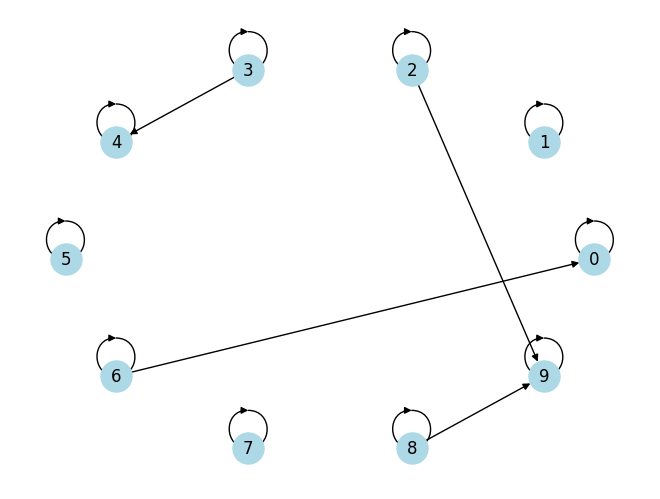

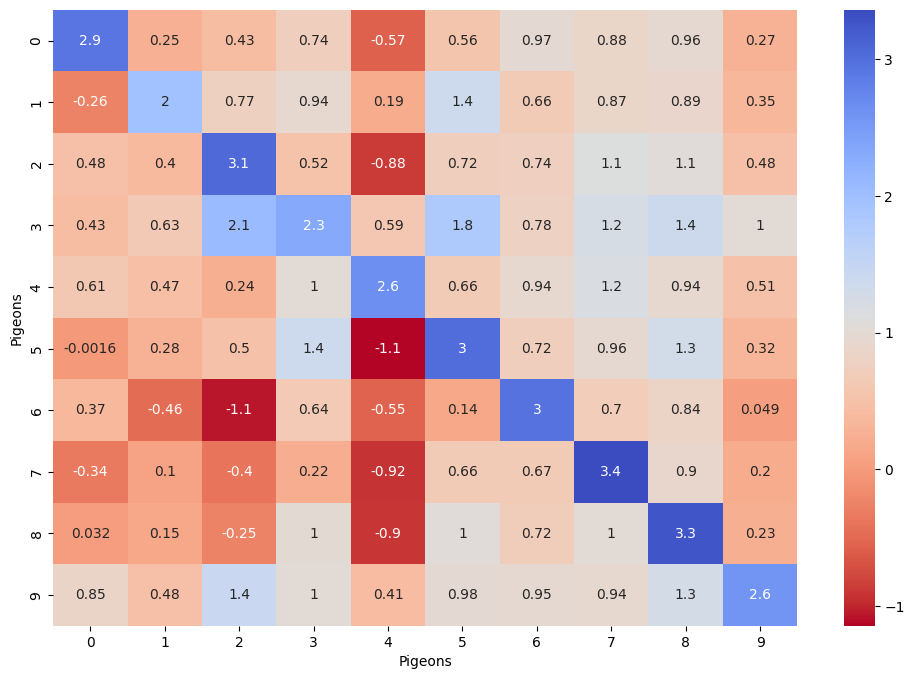

Results:
0 has 0 descendant nodes.
1 has 0 descendant nodes.
2 has 1 descendant nodes.
3 has 1 descendant nodes.
4 has 0 descendant nodes.
5 has 0 descendant nodes.
6 has 1 descendant nodes.
7 has 0 descendant nodes.
8 has 1 descendant nodes.
9 has 0 descendant nodes.
2 has the most descendant nodes and is the leader.


,0,1,2,3,4,5,6,7,8,9
0,0.0,19.470944,9.196749,12.867672,11.107969,9.75175,7.171441,8.094927,9.589738,12.822813
1,19.470944,0.0,15.543427,13.509551,17.526414,17.833519,17.632268,17.260284,15.045645,14.867694
2,9.196749,15.543427,0.0,8.345393,11.479552,8.104188,8.633101,7.853085,8.080569,8.939265
3,12.867672,13.509551,8.345393,0.0,12.818101,11.044811,11.713088,10.642248,8.677894,7.433945
4,11.107969,17.526414,11.479552,12.818101,0.0,12.075447,9.431143,10.024342,12.635436,13.186451
5,9.75175,17.833519,8.104188,11.044811,12.075447,0.0,8.496783,7.884271,7.704302,11.744742
6,7.171441,17.632268,8.633101,11.713088,9.431143,8.496783,0.0,7.589885,8.065736,12.28263
7,8.094927,17.260284,7.853085,10.642248,10.024342,7.884271,7.589885,0.0,8.224228,11.028524
8,9.589738,15.045645,8.080569,8.677894,12.635436,7.704302,8.065736,8.224228,0.0,9.864449
9,12.822813,14.867694,8.939265,7.433945,13.186451,11.744742,12.28263,11.028524,9.864449,0.0


In [ ]:
for i in range(1,6):
    print(f"FREE FLIGHT C{i} CAUSAL INFERENCE:")
    fname=f"Data/n10/ffC{i}.csv"
    df = pd.read_csv(fname).iloc[:,1:]
    n = df.shape[-1]//9
    df = df.iloc[:,flatten_tuple_list([(9*x+3, 9*y+3+1, 9*z+3+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df = df.iloc[:,:]
    
    res=runCausality(df)
    G =  res[2]
    determine_leader2(G)

    df_pos = pd.read_csv(fname).iloc[:,1:]
    n = df_pos.shape[-1]//9
    df_pos = df_pos.iloc[:,flatten_tuple_list([(9*x, 9*y+1, 9*z+2) for x, y, z in zip(range(0, n), range(0, n), range(0, n))])]
    df_pos = df_pos.iloc[:,:]

    display(average_dist(df_pos))